Ailish O'Gara
Department of Data Science, University of Michigan
Human Activity Recognition Using Smartphones: A Machine Learning Approach, December 2024

In [ ]:
# Preprocessing
import pandas as pd
import numpy as np

In [4]:
# Load features and activity labels
features = pd.read_csv('features.txt', sep=r'\s+', header=None, names=['index', 'feature'])
activity_labels = pd.read_csv('activity_labels.txt', sep=r'\s+', header=None, names=['id', 'activity'])

# Load train data
X_train = pd.read_csv('X_train.txt', sep=r'\s+', header=None)
y_train = pd.read_csv('y_train.txt', sep=r'\s+', header=None, names=['activity'])
subject_train = pd.read_csv('subject_train.txt', sep=r'\s+', header=None, names=['subject'])

# Load test data
X_test = pd.read_csv('X_test.txt', sep=r'\s+', header=None)
y_test = pd.read_csv('y_test.txt', sep=r'\s+', header=None, names=['activity'])
subject_test = pd.read_csv('subject_test.txt', sep=r'\s+', header=None, names=['subject'])

In [5]:
X_train.columns = features['feature']
X_test.columns = features['feature']

In [6]:
activity_map = dict(zip(activity_labels['id'], activity_labels['activity']))
y_train['activity'] = y_train['activity'].map(activity_map)
y_test['activity'] = y_test['activity'].map(activity_map)

In [7]:
# Combine train and test datasets
train = pd.concat([subject_train, y_train, X_train], axis=1)
test = pd.concat([subject_test, y_test, X_test], axis=1)

In [8]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())

0
0


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
print(y_train['activity'].value_counts())
print(y_test['activity'].value_counts())

activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64
activity
LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: count, dtype: int64


In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Reduced feature dimensions: {X_train_pca.shape[1]}")

Reduced feature dimensions: 102


In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train[['activity']])
y_test_encoded = encoder.transform(y_test[['activity']])

In [ ]:
# More EDA (Exploratory Data Analysis)

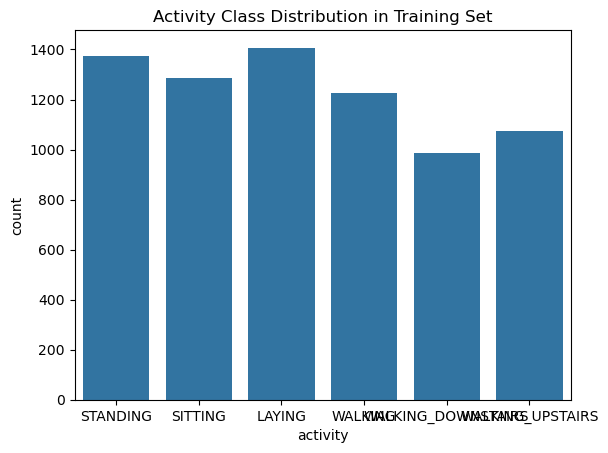

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_train['activity'])
plt.title("Activity Class Distribution in Training Set")
plt.show()

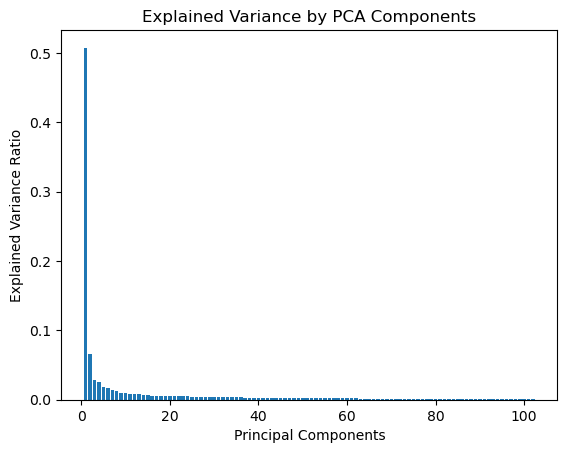

In [ ]:
# EFA (Exploratory Feature Analysis)
import matplotlib.pyplot as plt
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.show()

<Axes: >

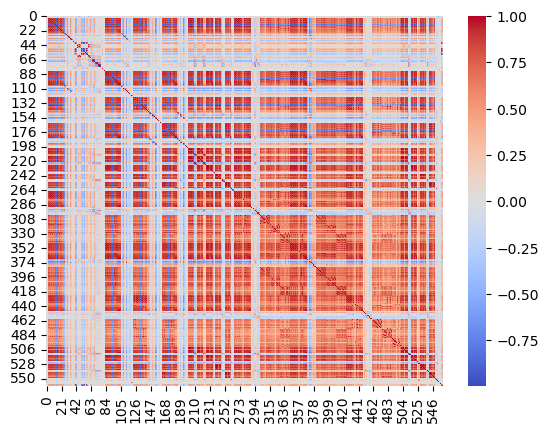

In [ ]:
# Crrelation Analysis
import seaborn as sns
corr_matrix = pd.DataFrame(X_train_scaled).corr()
sns.heatmap(corr_matrix, cmap="coolwarm")

Part 1 - Baseline Model Training

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Logistic Regression - Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      1.00       537
           SITTING       0.92      0.87      0.89       491
          STANDING       0.88      0.93      0.91       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.94      0.90      0.92       420
  WALKING_UPSTAIRS       0.91      0.90      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



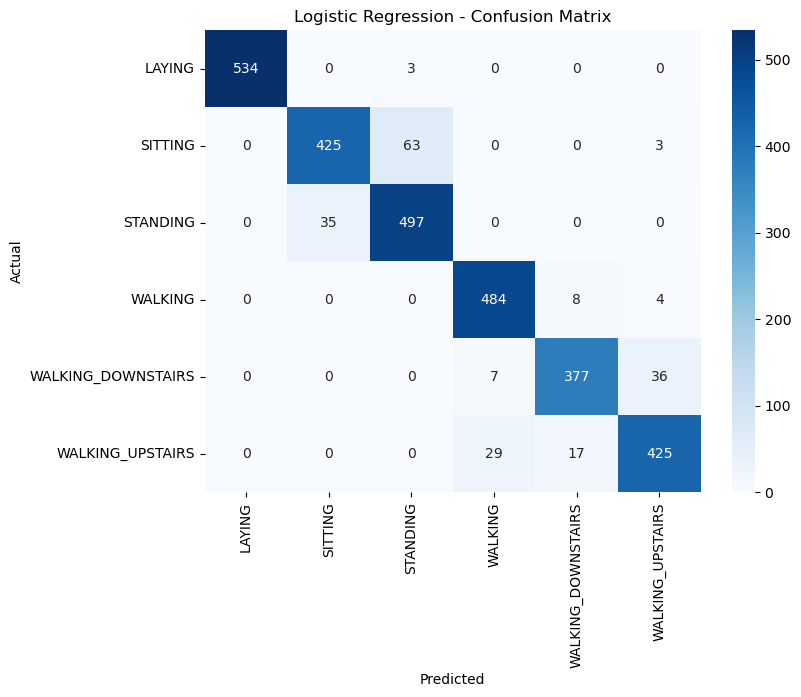

In [21]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_pca, y_train['activity'])

# Predict and Evaluate
y_pred_logreg = log_reg.predict(X_test_pca)

print("Logistic Regression - Classification Report:")
print(classification_report(y_test['activity'], y_pred_logreg))

# Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test['activity'], y_pred_logreg)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest - Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.95      0.97       537
           SITTING       0.87      0.68      0.76       491
          STANDING       0.76      0.95      0.85       532
           WALKING       0.81      0.96      0.88       496
WALKING_DOWNSTAIRS       0.92      0.73      0.82       420
  WALKING_UPSTAIRS       0.92      0.91      0.91       471

          accuracy                           0.87      2947
         macro avg       0.88      0.86      0.87      2947
      weighted avg       0.88      0.87      0.87      2947



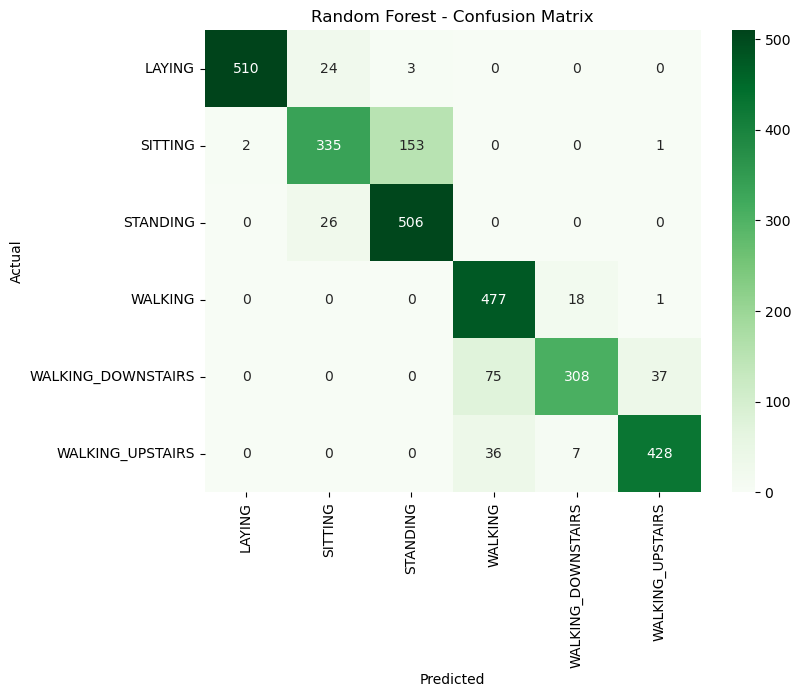

In [22]:
# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train_pca, y_train['activity'])

# Predict and Evaluate
y_pred_rf = rf_clf.predict(X_test_pca)

print("Random Forest - Classification Report:")
print(classification_report(y_test['activity'], y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test['activity'], y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM - Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.93      0.88      0.90       491
          STANDING       0.90      0.94      0.92       532
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.97      0.88      0.92       420
  WALKING_UPSTAIRS       0.89      0.94      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.94      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



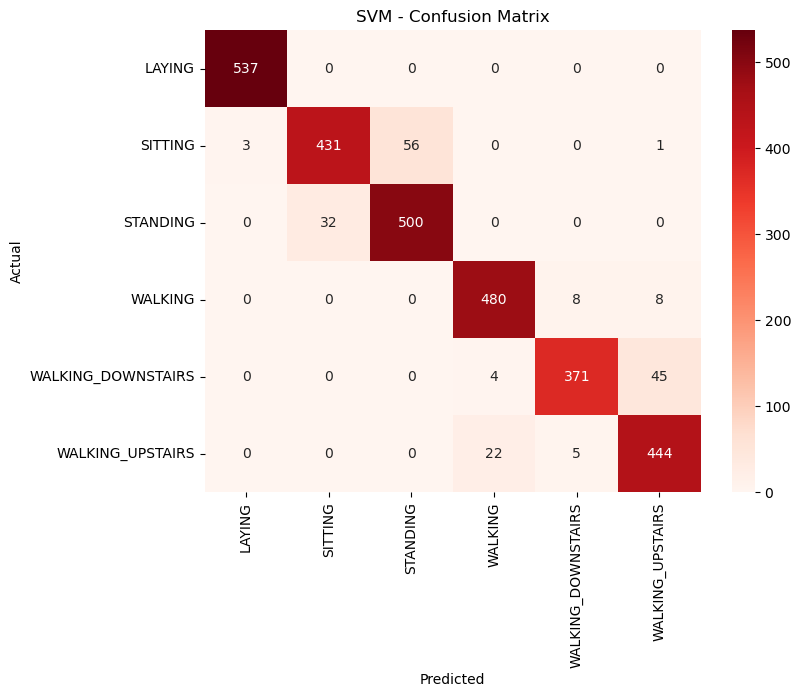

In [23]:
# Train SVM
svm_clf = SVC(kernel='rbf', C=1, random_state=42)
svm_clf.fit(X_train_pca, y_train['activity'])

# Predict and Evaluate
y_pred_svm = svm_clf.predict(X_test_pca)

print("SVM - Classification Report:")
print(classification_report(y_test['activity'], y_pred_svm))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test['activity'], y_pred_svm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Reds', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_pca, y_train['activity'])

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 150}
Best Score: 0.8592229188697104


Part 2 - Advanced Model Experimentation

In [27]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Gradient Boosting - Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      0.98      0.99       537
           SITTING       0.89      0.83      0.86       491
          STANDING       0.86      0.92      0.89       532
           WALKING       0.85      0.96      0.90       496
WALKING_DOWNSTAIRS       0.93      0.75      0.83       420
  WALKING_UPSTAIRS       0.89      0.93      0.91       471

          accuracy                           0.90      2947
         macro avg       0.90      0.89      0.90      2947
      weighted avg       0.90      0.90      0.90      2947



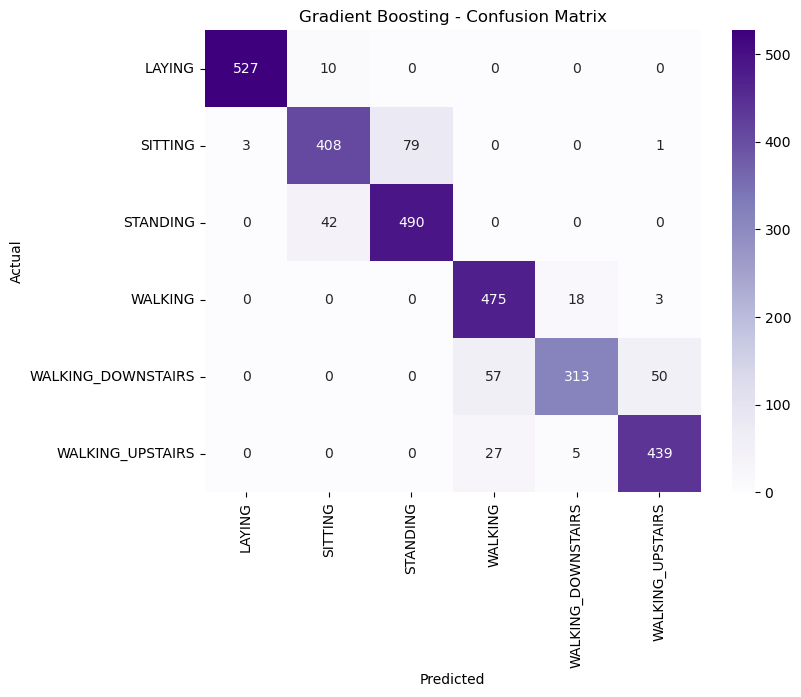

In [28]:
# Train Gradient Boosting
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train_pca, y_train['activity'])

# Predict and Evaluate
y_pred_gb = gb_clf.predict(X_test_pca)

print("Gradient Boosting - Classification Report:")
print(classification_report(y_test['activity'], y_pred_gb))

# Confusion Matrix
conf_matrix_gb = confusion_matrix(y_test['activity'], y_pred_gb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Purples', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
# Map activity labels to numerical values
label_mapping = {label: idx for idx, label in enumerate(encoder.categories_[0])}
y_train_num = y_train['activity'].map(label_mapping)
y_test_num = y_test['activity'].map(label_mapping)

XGBoost - Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.89      0.79      0.84       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.85      0.96      0.90       496
WALKING_DOWNSTAIRS       0.93      0.74      0.83       420
  WALKING_UPSTAIRS       0.89      0.93      0.91       471

          accuracy                           0.89      2947
         macro avg       0.90      0.89      0.89      2947
      weighted avg       0.90      0.89      0.89      2947



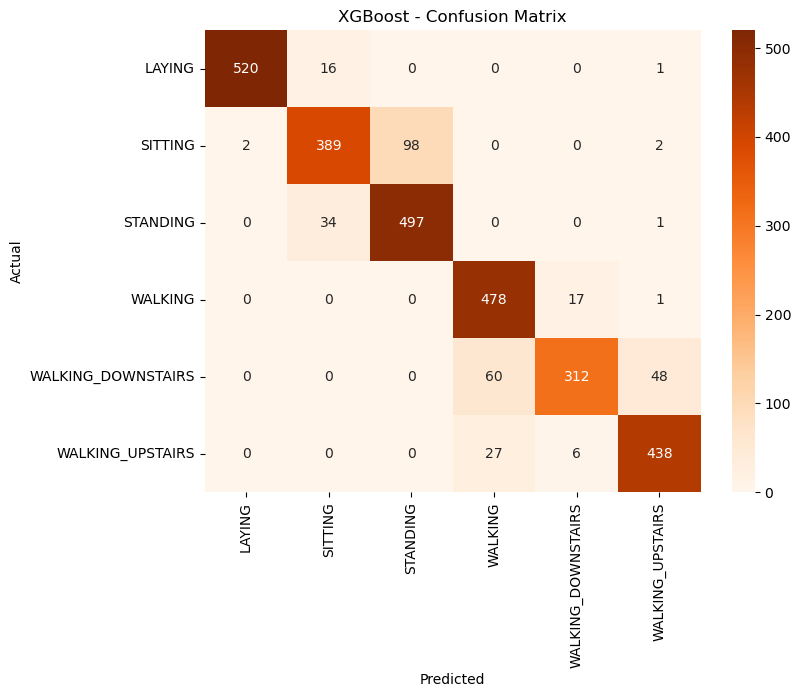

In [33]:
# Train XGBoost
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, eval_metric='mlogloss')
xgb_clf.fit(X_train_pca, y_train_num)

# Predict and Evaluate
y_pred_xgb = xgb_clf.predict(X_test_pca)

# Map numerical predictions back to string labels
y_pred_xgb_labels = [encoder.categories_[0][i] for i in y_pred_xgb]

print("XGBoost - Classification Report:")
print(classification_report(y_test['activity'], y_pred_xgb_labels))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test['activity'], y_pred_xgb_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XGBoost (Full Dataset) - Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.85      0.89       491
          STANDING       0.88      0.94      0.91       532
           WALKING       0.93      0.99      0.96       496
WALKING_DOWNSTAIRS       0.97      0.91      0.94       420
  WALKING_UPSTAIRS       0.92      0.92      0.92       471

          accuracy                           0.94      2947
         macro avg       0.94      0.93      0.94      2947
      weighted avg       0.94      0.94      0.94      2947



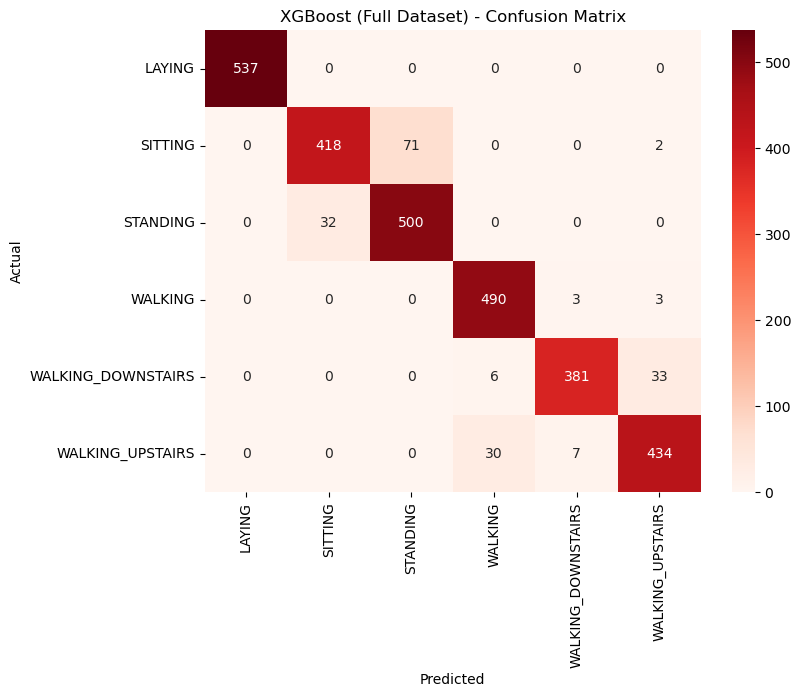

In [ ]:
# Map activity labels to numerical values as a check
label_mapping = {label: idx for idx, label in enumerate(encoder.categories_[0])}
y_train_num = y_train['activity'].map(label_mapping)
y_test_num = y_test['activity'].map(label_mapping)

# Train XGBoost on Full Dataset
xgb_clf_full = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, eval_metric='mlogloss')
xgb_clf_full.fit(X_train_scaled, y_train_num)

# Predict and Evaluate
y_pred_xgb_full = xgb_clf_full.predict(X_test_scaled)

# Map numerical predictions back to string labels
y_pred_xgb_full_labels = [encoder.categories_[0][i] for i in y_pred_xgb_full]

print("XGBoost (Full Dataset) - Classification Report:")
print(classification_report(y_test['activity'], y_pred_xgb_full_labels))

# Confusion Matrix
conf_matrix_xgb_full = confusion_matrix(y_test['activity'], y_pred_xgb_full_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_full, annot=True, fmt='d', cmap='Reds', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("XGBoost (Full Dataset) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Part 3: Deep Learning Experimentation

In [50]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
# Reshape data for Conv1D: (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Convert labels to one-hot encoding
y_train_cnn = to_categorical(y_train_num)
y_test_cnn = to_categorical(y_test_num)

In [52]:
# Define CNN architecture
model = Sequential([
    Input(shape=(X_train_scaled.shape[1], 1)),  # Explicit Input layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes for the activities
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the CNN
history = model.fit(X_train_cnn, y_train_cnn,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test_cnn, y_test_cnn),
                    verbose=1)


Epoch 1/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7369 - loss: 0.6662 - val_accuracy: 0.9260 - val_loss: 0.1920
Epoch 2/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9410 - loss: 0.1583 - val_accuracy: 0.9494 - val_loss: 0.1376
Epoch 3/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9539 - loss: 0.1284 - val_accuracy: 0.9427 - val_loss: 0.1597
Epoch 4/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9592 - loss: 0.1027 - val_accuracy: 0.9260 - val_loss: 0.1868
Epoch 5/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9666 - loss: 0.0946 - val_accuracy: 0.9430 - val_loss: 0.1556
Epoch 6/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9705 - loss: 0.0825 - val_accuracy: 0.9342 - val_loss: 0.1828
Epoch 7/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.9800 - loss: 0.0624 - val_accuracy: 0.9522 - val_loss: 0.1229
Epoch 8/20
230/230 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9741 - loss: 0.0645 - val_accu

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9512 - loss: 0.2207
Test Loss: 0.21534372866153717
Test Accuracy: 0.9552086591720581
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
CNN - Classification Report:
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       537
           SITTING       0.96      0.86      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.98      0.94      0.96       420
  WALKING_UPSTAIRS       0.96      0.97      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.95      0.95      2947
      weighted avg       0.96      0.96      0.95      2947



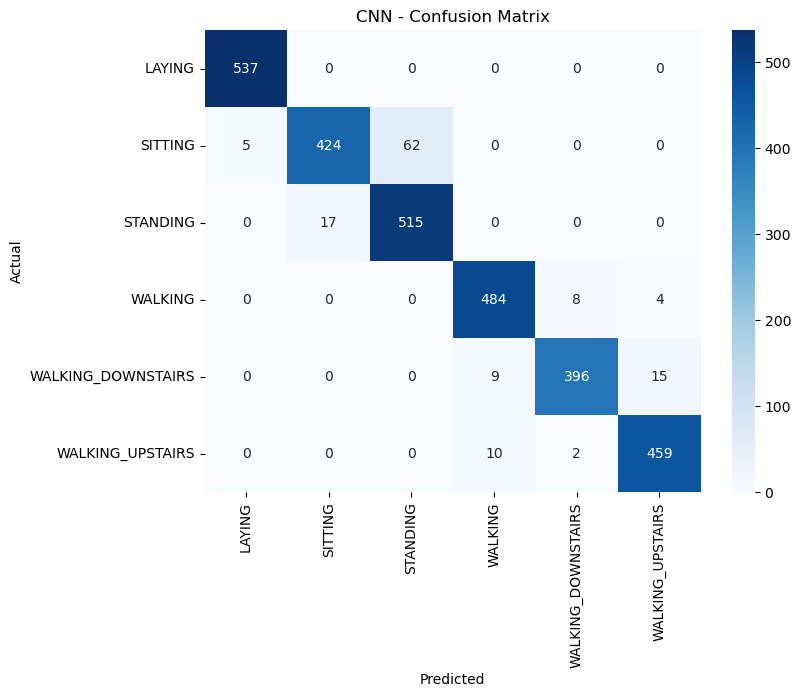

In [53]:
# Evaluate model performance
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict labels for test data
y_pred_cnn = model.predict(X_test_cnn)
y_pred_cnn_labels = [encoder.categories_[0][i] for i in y_pred_cnn.argmax(axis=1)]

# Classification Report
print("CNN - Classification Report:")
print(classification_report(y_test['activity'], y_pred_cnn_labels))

# Confusion Matrix
conf_matrix_cnn = confusion_matrix(y_test['activity'], y_pred_cnn_labels)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

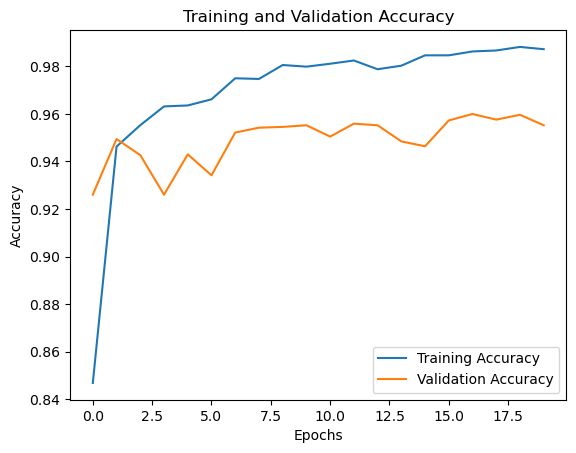

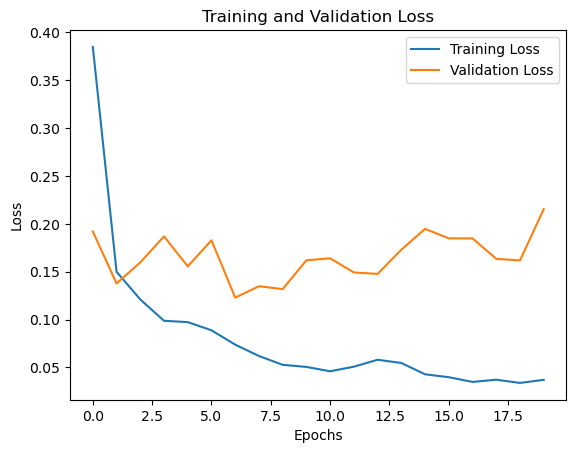

In [54]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Part 4 - Cross-Validation and Robustness Testing

In [56]:
from sklearn.model_selection import cross_val_score

# Logistic Regression Cross-Validation
log_reg_cv = LogisticRegression(max_iter=1000, random_state=42)
log_reg_scores = cross_val_score(log_reg_cv, X_train_pca, y_train_num, cv=5, scoring='accuracy')
print(f"Logistic Regression - Cross-Validation Accuracy: {log_reg_scores.mean():.4f} (+/- {log_reg_scores.std():.4f})")

# Random Forest Cross-Validation
rf_clf_cv = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_scores = cross_val_score(rf_clf_cv, X_train_pca, y_train_num, cv=5, scoring='accuracy')
print(f"Random Forest - Cross-Validation Accuracy: {rf_scores.mean():.4f} (+/- {rf_scores.std():.4f})")

# SVM Cross-Validation
svm_clf_cv = SVC(kernel='rbf', C=1, random_state=42)
svm_scores = cross_val_score(svm_clf_cv, X_train_pca, y_train_num, cv=5, scoring='accuracy')
print(f"SVM - Cross-Validation Accuracy: {svm_scores.mean():.4f} (+/- {svm_scores.std():.4f})")

Logistic Regression - Cross-Validation Accuracy: 0.9214 (+/- 0.0250)
Random Forest - Cross-Validation Accuracy: 0.8494 (+/- 0.0183)
SVM - Cross-Validation Accuracy: 0.9184 (+/- 0.0192)


In [58]:
from sklearn.model_selection import LeaveOneGroupOut

# Prepare Leave-One-Subject-Out (group by subject IDs)
logo = LeaveOneGroupOut()

# Logistic Regression with Leave-One-Subject-Out
log_reg_logo = LogisticRegression(max_iter=1000, random_state=42)
logo_scores = []

# Iterate through each split
for train_idx, test_idx in logo.split(X_train_pca, y_train_num, groups=subject_train['subject']):
    log_reg_logo.fit(X_train_pca[train_idx], y_train_num.iloc[train_idx])
    score = log_reg_logo.score(X_train_pca[test_idx], y_train_num.iloc[test_idx])
    logo_scores.append(score)

print(f"Logistic Regression - Leave-One-Subject-Out Accuracy: {np.mean(logo_scores):.4f} (+/- {np.std(logo_scores):.4f})")

Logistic Regression - Leave-One-Subject-Out Accuracy: 0.9235 (+/- 0.0712)


In [61]:
# Add Gaussian noise to test features
noise = np.random.normal(loc=0, scale=0.01, size=X_test_pca.shape)
X_test_noisy = X_test_pca + noise

# Evaluate Logistic Regression on Noisy Test Set
log_reg.fit(X_train_pca, y_train_num)
log_reg_noisy_score = log_reg.score(X_test_noisy, y_test_num)
print(f"Logistic Regression - Accuracy on Noisy Test Set: {log_reg_noisy_score:.4f}")

Logistic Regression - Accuracy on Noisy Test Set: 0.9301


In [64]:
# Predict on test set using XGBoost
y_pred_xgb = xgb_clf.predict(X_test_pca)

# Calculate accuracy for XGBoost
from sklearn.metrics import accuracy_score
test_accuracy_xgb = accuracy_score(y_test_num, y_pred_xgb)
print(f"XGBoost Test Accuracy: {test_accuracy_xgb:.4f}")

XGBoost Test Accuracy: 0.8938


In [65]:
# Retrieve CNN test accuracy from training history
test_accuracy_cnn = history.history['val_accuracy'][-1]
print(f"CNN Test Accuracy: {test_accuracy_cnn:.4f}")

CNN Test Accuracy: 0.9552


In [100]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Fit LabelEncoder on y_train['activity'] (original labels)
label_encoder = LabelEncoder()
label_encoder.fit(y_train['activity'])  # Fit on original string labels

# Transform y_test['activity'] into encoded labels
y_test_encoded = label_encoder.transform(y_test['activity'])

# Convert numerical predictions to string labels if needed
def convert_predictions_to_strings(y_pred, encoder):
    if np.issubdtype(type(y_pred[0]), np.integer):  # If numeric, map back to string labels
        return encoder.inverse_transform(y_pred)
    return y_pred

# Logistic Regression
try:
    y_pred_log_reg_str = convert_predictions_to_strings(y_pred_log_reg, label_encoder)
    y_pred_log_reg_encoded = label_encoder.transform(y_pred_log_reg_str)  # Encode again
    f1_score_log_reg = f1_score(y_test_encoded, y_pred_log_reg_encoded, average='weighted')
    print(f"F1 Score (Logistic Regression): {f1_score_log_reg:.4f}")
except ValueError as e:
    print(f"Error calculating F1 Score (Logistic Regression): {e}")

# Random Forest
try:
    y_pred_rf_encoded = label_encoder.transform(y_pred_rf)  # Ensure predictions are encoded
    f1_score_rf = f1_score(y_test_encoded, y_pred_rf_encoded, average='weighted')
    print(f"F1 Score (Random Forest): {f1_score_rf:.4f}")
except ValueError as e:
    print(f"Error calculating F1 Score (Random Forest): {e}")

# SVM
try:
    y_pred_svm_encoded = label_encoder.transform(y_pred_svm)
    f1_score_svm = f1_score(y_test_encoded, y_pred_svm_encoded, average='weighted')
    print(f"F1 Score (SVM): {f1_score_svm:.4f}")
except ValueError as e:
    print(f"Error calculating F1 Score (SVM): {e}")

# XGBoost
try:
    y_pred_xgb_str = convert_predictions_to_strings(y_pred_xgb, label_encoder)
    y_pred_xgb_encoded = label_encoder.transform(y_pred_xgb_str)
    f1_score_xgb = f1_score(y_test_encoded, y_pred_xgb_encoded, average='weighted')
    print(f"F1 Score (XGBoost): {f1_score_xgb:.4f}")
except ValueError as e:
    print(f"Error calculating F1 Score (XGBoost): {e}")

# CNN
try:
    if len(y_pred_cnn.shape) > 1:  # If predictions are probabilities, use argmax
        y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels
    y_pred_cnn_str = convert_predictions_to_strings(y_pred_cnn, label_encoder)  # Map to string labels
    y_pred_cnn_encoded = label_encoder.transform(y_pred_cnn_str)  # Encode properly
    f1_score_cnn = f1_score(y_test_encoded, y_pred_cnn_encoded, average='weighted')
    print(f"F1 Score (CNN): {f1_score_cnn:.4f}")
except ValueError as e:
    print(f"Error calculating F1 Score (CNN): {e}")

F1 Score (Logistic Regression): 0.9303
F1 Score (Random Forest): 0.8682
F1 Score (SVM): 0.9374
F1 Score (XGBoost): 0.8925
F1 Score (CNN): 0.9550


In [114]:
import time
from sklearn.metrics import accuracy_score

# Dictionary to store runtimes
runtimes = {}

# Logistic Regression
start_time = time.time()
log_reg.fit(X_train_pca, y_train_num)
train_time_log_reg = time.time() - start_time

start_time = time.time()
y_pred_log_reg = log_reg.predict(X_test_pca)
predict_time_log_reg = time.time() - start_time

runtimes['Logistic Regression'] = {
    'train_time': train_time_log_reg,
    'predict_time': predict_time_log_reg,
}

# Random Forest
start_time = time.time()
rf_clf.fit(X_train_pca, y_train_num)
train_time_rf = time.time() - start_time

start_time = time.time()
y_pred_rf = rf_clf.predict(X_test_pca)
predict_time_rf = time.time() - start_time

runtimes['Random Forest'] = {
    'train_time': train_time_rf,
    'predict_time': predict_time_rf,
}

# SVM
start_time = time.time()
svm_clf.fit(X_train_pca, y_train_num)
train_time_svm = time.time() - start_time

start_time = time.time()
y_pred_svm = svm_clf.predict(X_test_pca)
predict_time_svm = time.time() - start_time

runtimes['SVM'] = {
    'train_time': train_time_svm,
    'predict_time': predict_time_svm,
}

# XGBoost
start_time = time.time()
xgb_clf.fit(X_train_pca, y_train_num)
train_time_xgb = time.time() - start_time

start_time = time.time()
y_pred_xgb = xgb_clf.predict(X_test_pca)
predict_time_xgb = time.time() - start_time

runtimes['XGBoost'] = {
    'train_time': train_time_xgb,
    'predict_time': predict_time_xgb,
}

# CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
# CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
# Define CNN architecture
model = Sequential([
    Input(shape=(X_train_scaled.shape[1], 1)),  # Explicit Input layer
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes for the activities
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from keras.utils import to_categorical

# One-hot encode the target labels
y_train_one_hot = to_categorical(y_train_encoded)  # One-hot encode the training labels
y_test_one_hot = to_categorical(y_test_encoded)  # One-hot encode the test labels

start_time = time.time()
model.fit(X_train_cnn, y_train_one_hot, epochs=5, batch_size=32, verbose=0)
train_time_cnn = time.time() - start_time

start_time = time.time()
y_pred_cnn = model.predict(X_test_cnn)
predict_time_cnn = time.time() - start_time

runtimes['CNN'] = {
    'train_time': train_time_cnn,
    'predict_time': predict_time_cnn,
}

# Display runtimes
for model, times in runtimes.items():
    print(f"{model} - Train Time: {times['train_time']:.4f}s, Predict Time: {times['predict_time']:.4f}s")

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Logistic Regression - Train Time: 368.5325s, Predict Time: 0.0303s
Random Forest - Train Time: 7.6681s, Predict Time: 0.0385s
SVM - Train Time: 0.9080s, Predict Time: 1.5538s
XGBoost - Train Time: 2.7153s, Predict Time: 0.0082s
CNN - Train Time: 30.9292s, Predict Time: 0.9405s


Part 5 - Comparative Analysis and Visualization

In [66]:
# Aggregate Accuracy Scores
performance_summary = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "CNN"],
    "Accuracy": [log_reg_scores.mean(), rf_scores.mean(), svm_scores.mean(), 
                 test_accuracy_xgb, test_accuracy_cnn],  # Add CNN and XGBoost accuracies
}

# Create DataFrame for easier visualization
performance_df = pd.DataFrame(performance_summary)
print(performance_df)

                 Model  Accuracy
0  Logistic Regression  0.921389
1        Random Forest  0.849430
2                  SVM  0.918394
3              XGBoost  0.893790
4                  CNN  0.955209


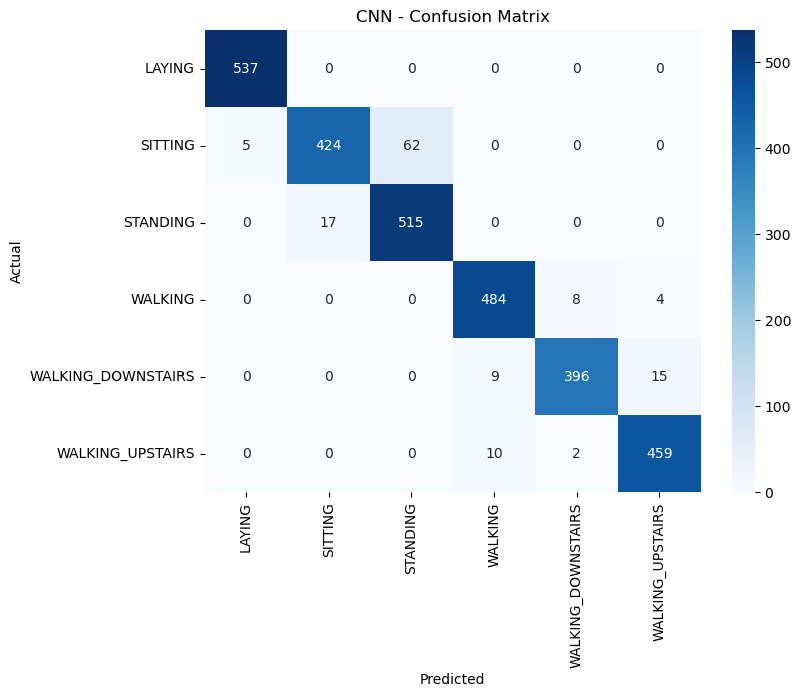

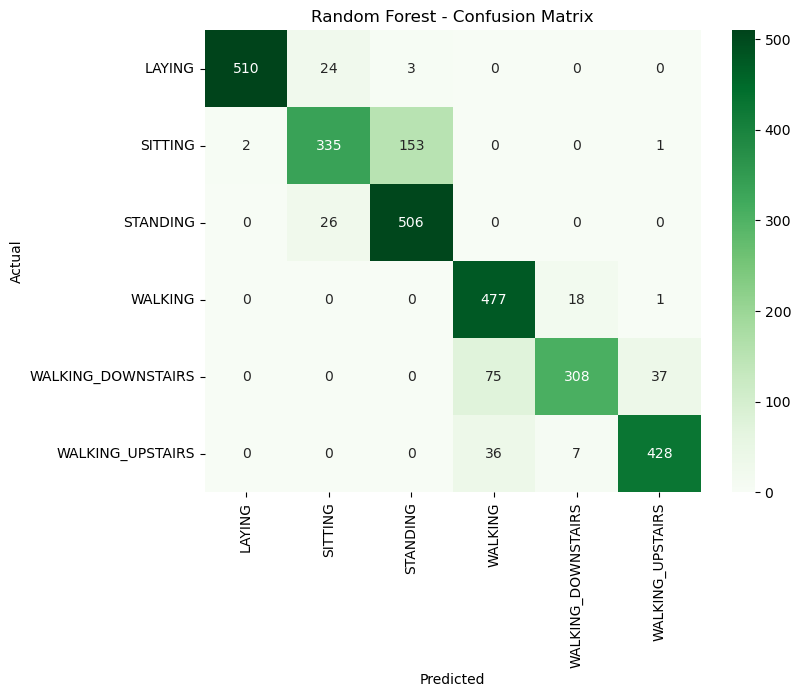

In [88]:
# CNN Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("CNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Part 6 - Model Deployment and Final Analysis

Model Performance Summary:
                 Model  Accuracy  F1-Score  Training Time (s)  \
0  Logistic Regression  0.921389  0.930254         368.532483   
1        Random Forest  0.849430  0.868180           7.668128   
2                  SVM  0.918394  0.937419           0.907980   
3              XGBoost  0.893790  0.892524           2.715274   
4                  CNN  0.955209  0.954970          30.929212   

   Prediction Time (s)  
0             0.030304  
1             0.038510  
2             1.553759  
3             0.008177  
4             0.940502  


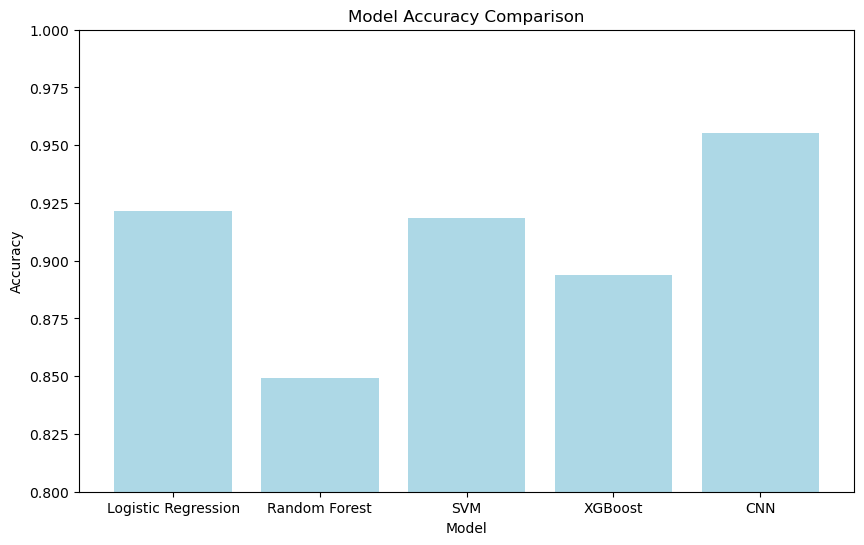

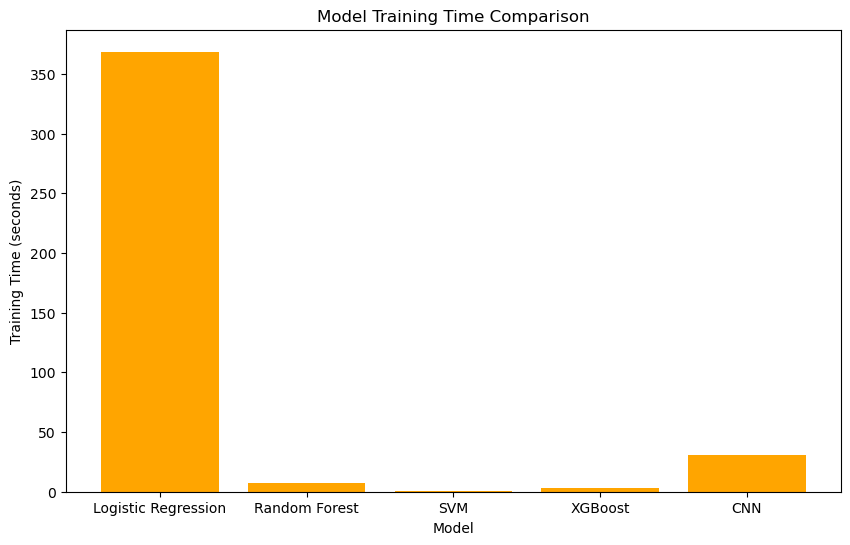

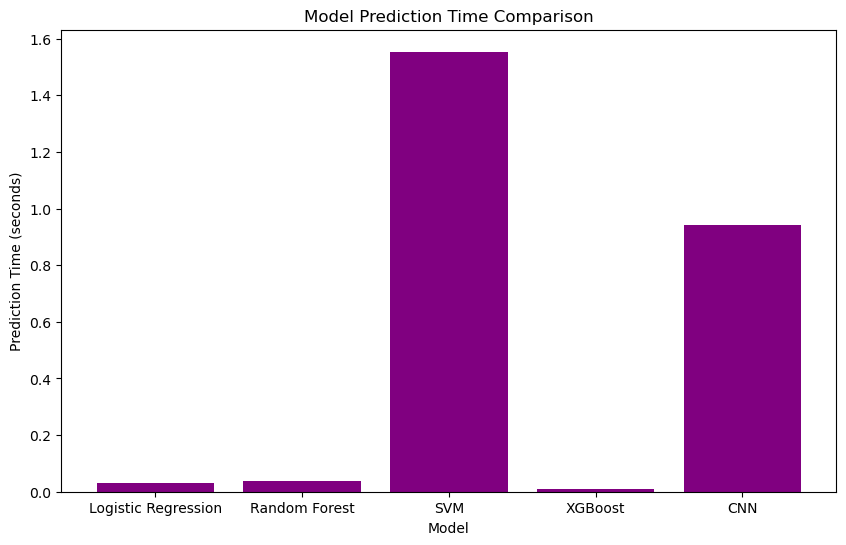

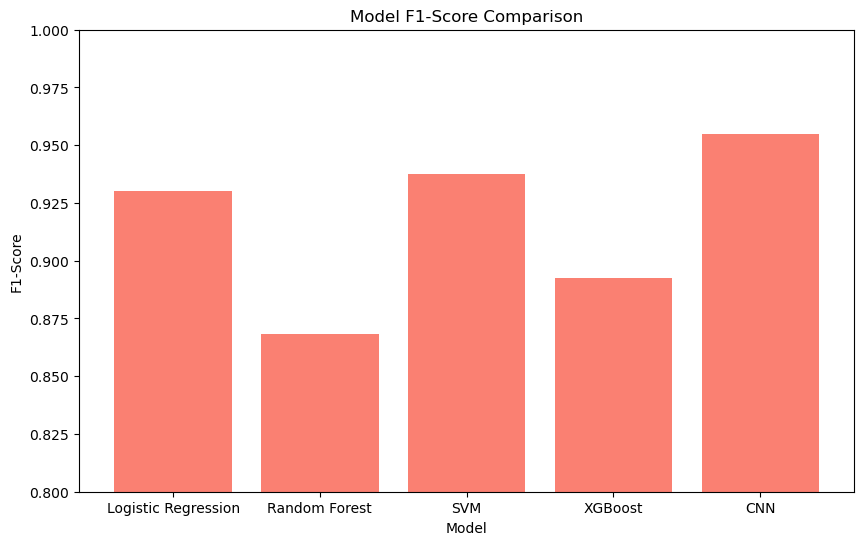

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure these variables align with your calculated results
performance_summary = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "CNN"],
    "Accuracy": [
        log_reg_scores.mean(),
        rf_scores.mean(),
        svm_scores.mean(),
        test_accuracy_xgb,
        test_accuracy_cnn
    ],
    "F1-Score": [
        f1_score_log_reg if 'f1_score_log_reg' in globals() else 'NA',
        f1_score_rf if 'f1_score_rf' in globals() else 'NA',
        f1_score_svm if 'f1_score_svm' in globals() else 'NA',
        f1_score_xgb if 'f1_score_xgb' in globals() else 'NA',
        f1_score_cnn if 'f1_score_cnn' in globals() else 'NA'
    ],
    "Training Time (s)": [
        runtimes['Logistic Regression']['train_time'] if 'runtimes' in globals() else 'NA',
        runtimes['Random Forest']['train_time'] if 'runtimes' in globals() else 'NA',
        runtimes['SVM']['train_time'] if 'runtimes' in globals() else 'NA',
        runtimes['XGBoost']['train_time'] if 'runtimes' in globals() else 'NA',
        runtimes['CNN']['train_time'] if 'runtimes' in globals() else 'NA'
    ],
    "Prediction Time (s)": [
        runtimes['Logistic Regression']['predict_time'] if 'runtimes' in globals() else 'NA',
        runtimes['Random Forest']['predict_time'] if 'runtimes' in globals() else 'NA',
        runtimes['SVM']['predict_time'] if 'runtimes' in globals() else 'NA',
        runtimes['XGBoost']['predict_time'] if 'runtimes' in globals() else 'NA',
        runtimes['CNN']['predict_time'] if 'runtimes' in globals() else 'NA'
    ]
}

# Create DataFrame for aggregation
performance_df = pd.DataFrame(performance_summary)

# Output the aggregated table
print("Model Performance Summary:")
print(performance_df)

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Accuracy"], color="lightblue")
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)  # Adjust limits as per your results
plt.show()

# Plot Training Time Comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Training Time (s)"], color="orange")
plt.title("Model Training Time Comparison")
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.show()

# Plot Prediction Time Comparison
plt.figure(figsize=(10, 6))
plt.bar(performance_df["Model"], performance_df["Prediction Time (s)"], color="purple")
plt.title("Model Prediction Time Comparison")
plt.xlabel("Model")
plt.ylabel("Prediction Time (seconds)")
plt.show()

# Plot F1-Score Comparison (if applicable)
if 'NA' not in performance_df["F1-Score"].values:
    plt.figure(figsize=(10, 6))
    plt.bar(performance_df["Model"], performance_df["F1-Score"], color="salmon")
    plt.title("Model F1-Score Comparison")
    plt.xlabel("Model")
    plt.ylabel("F1-Score")
    plt.ylim(0.8, 1.0)  # Adjust limits as per your results
    plt.show()
else:
    print("F1-Scores are missing for some models; skipping F1-Score comparison.")
